In [1]:
# Engineering Analysis libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Mounting the data dir 
from pathlib import Path
data_dir_raw = Path('.').resolve().parent / "data" / "raw"

In [2]:
# Load raw data 
df = pd.read_csv(data_dir_raw / "health-insurance-us.csv")
print(f'Shape of the data: {df.shape}')
print(f'Preview of the data:\n {df.head()}')

Shape of the data: (1338, 7)
Preview of the data:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Understand structure 
print(f'Data types and null values:\n {df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Data types and null values:
 None


In [4]:
# No missing values but check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Display both rows involved in duplicates, including original DataFrame indices
dup_rows = df[df.duplicated(keep=False)].reset_index().rename(columns={'index': 'orig_index'})
print(f'Duplicate rows:\n {dup_rows}')

# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

Number of duplicate rows: 1
Duplicate rows:
    orig_index  age   sex    bmi  children smoker     region    charges
0         195   19  male  30.59         0     no  northwest  1639.5631
1         581   19  male  30.59         0     no  northwest  1639.5631


In [5]:
# Check for malformed data (negative ages in numerical columns)
df_numeric = df.select_dtypes(include=['number'])
malformed_data = df_numeric[(df_numeric < 0).any(axis=1)]
print(f'Number of malformed rows: {malformed_data.shape[0]}')
malformed_data

Number of malformed rows: 0


,age,bmi,children,charges


In [6]:
# Basic statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


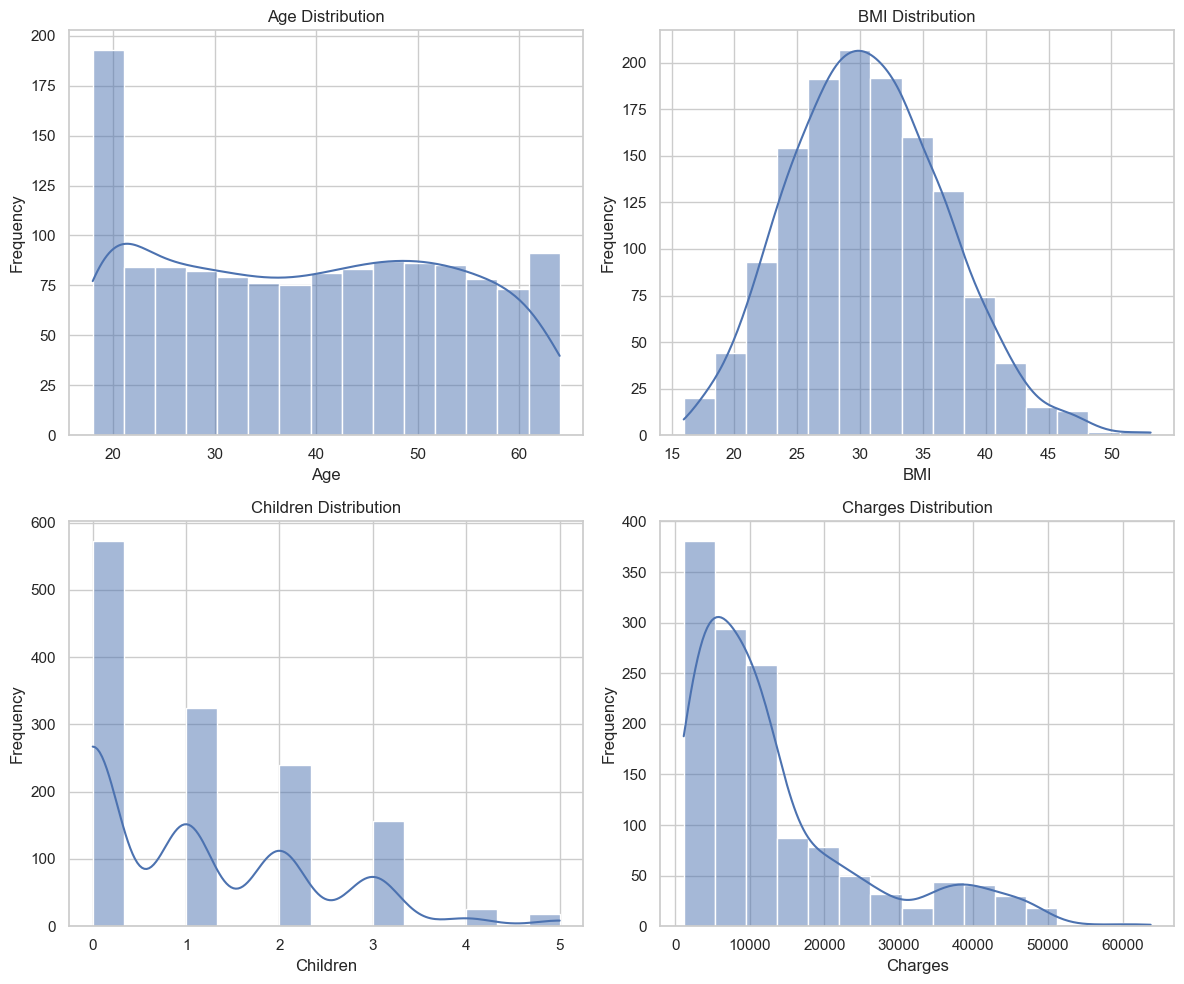

In [7]:
# Visual check for distributions - use subplots for ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['age'], bins=15, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['bmi'], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['children'], bins=15, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')
axes[1, 0].set_xlabel('Children')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['charges'], bins=15, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')
axes[1, 1].set_xlabel('Charges')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [8]:
# Save cleaned version to data/interim/cleaned_house_data_v1.csv
data_dir_interim = Path('.').resolve().parent / "data" / "interim"

# ensure target directory exists, then save
out_path = data_dir_interim / 'cleaned_health_insurance_us_v1.csv'
data_dir_interim.mkdir(parents=True, exist_ok=True)
df.to_csv(out_path, index=False)

# Only keep up to '../data/interim/' when logging
print('Saved cleaned dataframe to:', 'data/' + str(out_path.relative_to(data_dir_interim.parent)))

Saved cleaned dataframe to: data/interim/cleaned_health_insurance_us_v1.csv
